In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot




In [191]:
# Importing all datasets
import os
print(os.getcwd())
churn_data = pd.read_csv("/Users/manoj/work/iiit-upgrad/Machine-Learning-Case-Study/Telcome_Churn/data/telecom_churn_data.csv")
churn_data.head()

/Users/manoj/work/iiit-upgrad/Machine-Learning-Case-Study/Telcome_Churn


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [192]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [193]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### Too many rows to Analyze.
##### Check Missing data and remove who have too many missing values in column

In [194]:
missing_column = churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 50]
missing_column_data=churn_data[missing_column]
missing_column_data.isnull().sum()

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6           74846
total_rech_data_7           74428
total_rech_data_8           73660
total_rech_data_9           74077
max_rech_data_6             74846
max_rech_data_7             74428
max_rech_data_8             73660
max_rech_data_9             74077
count_rech_2g_6             74846
count_rech_2g_7             74428
count_rech_2g_8             73660
count_rech_2g_9             74077
count_rech_3g_6             74846
count_rech_3g_7             74428
count_rech_3g_8             73660
count_rech_3g_9             74077
av_rech_amt_data_6          74846
av_rech_amt_data_7          74428
av_rech_amt_data_8          73660
av_rech_amt_data_9          74077
arpu_3g_6                   74846
arpu_3g_7                   74428
arpu_3g_8                   73660
arpu_3g_9                   74077
arpu_2g_6                   74846
arpu_2g_7     

#### As too many column data are missing more than 50%, lets check if column value if missing more than 5%

In [195]:
#missing_column = churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 5]
#missing_column
#print((100*churn_data.isnull().sum()/len(churn_data.index)))
print(churn_data.filter(regex='rech').columns)
print("Missing Columns Name of more than 50% value missing=====")
print(churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 50])
missing_columns = churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 50]

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')
Missing Columns Name of more than 50% value

#### Lots of column having more than 50% data is mssing.

In [196]:
### Removing column if all rows value is missings
cleaned_churn_df = churn_data.drop(labels=missing_columns,axis=1)
cleaned_churn_df.shape

(99999, 186)

In [197]:
# Remove rows if any row value is missing
cleaned_churn_df = cleaned_churn_df.dropna(axis=0,how='any')
cleaned_churn_df.shape

(84185, 186)

#### Removed rows which having any missing values

In [198]:
cleaned_churn_df.select_dtypes(exclude=['int', 'float']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

In [199]:
date_attributes = ['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9']
cleaned_churn_df[date_attributes].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014
5,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/19/2014,7/17/2014,8/24/2014,9/28/2014


In [200]:
cleaned_churn_df[date_attributes] = cleaned_churn_df[date_attributes].applymap(lambda x : pd.to_datetime(x, infer_datetime_format=True))

In [201]:
cleaned_churn_df[date_attributes].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
1,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30
2,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29
3,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30
4,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28
5,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-19,2014-07-17,2014-08-24,2014-09-28


In [202]:
cleaned_churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,8.418500e+04,84185.0,84185.0,84185.0,84185.0,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,...,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000
mean,7.001227e+09,109.0,0.0,0.0,0.0,294.902871,298.714947,304.333608,290.683456,133.736664,...,0.092831,0.076914,0.084302,0.092534,0.094126,1273.130083,74.943136,71.805762,63.273043,3.737929
std,6.879239e+05,0.0,0.0,0.0,0.0,328.760913,342.675529,352.369638,350.229101,297.864522,...,0.400950,0.578251,0.638150,0.700907,0.688381,965.107844,278.726313,281.320228,260.105991,34.528453
min,7.000000e+09,109.0,0.0,0.0,0.0,-810.661000,-622.509000,-345.129000,-1474.195000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000641e+09,109.0,0.0,0.0,0.0,101.690000,103.141000,106.726000,93.483000,7.990000,...,0.000000,0.000000,0.000000,0.000000,0.000000,485.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001235e+09,109.0,0.0,0.0,0.0,209.143000,211.112000,215.082000,204.795000,35.430000,...,0.000000,0.000000,0.000000,0.000000,0.000000,936.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001822e+09,109.0,0.0,0.0,0.0,385.127000,388.069000,396.269000,384.121000,120.580000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,11.000000,29.000000,33.000000,41.000000,49.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [203]:
#churn_data.columns

## Data Preparation

In [204]:
## Number of days between two recharcge:
cleaned_churn_df['first_recharge_gap'] = cleaned_churn_df['date_of_last_rech_7'] - cleaned_churn_df['date_of_last_rech_6']
cleaned_churn_df['second_recharge_gap'] = cleaned_churn_df['date_of_last_rech_8'] - cleaned_churn_df['date_of_last_rech_7']
cleaned_churn_df['third_recharge_gap'] = cleaned_churn_df['date_of_last_rech_9'] - cleaned_churn_df['date_of_last_rech_8']

##### Remove date columns from data sets as of no use.

In [205]:
derived_df = cleaned_churn_df.drop(labels=date_attributes,axis=1)
derived_df['first_recharge_gap']= derived_df['first_recharge_gap']/np.timedelta64(1,'D')
derived_df['second_recharge_gap']= derived_df['second_recharge_gap']/np.timedelta64(1,'D')
derived_df['third_recharge_gap']= derived_df['third_recharge_gap']/np.timedelta64(1,'D')


derived_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,first_recharge_gap,second_recharge_gap,third_recharge_gap
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,0,1006,0.0,0.0,0.00,0.0,32.0,28.0,33.0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,0,1103,0.0,0.0,4.17,0.0,37.0,21.0,46.0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,0,2491,0.0,0.0,0.00,0.0,33.0,31.0,30.0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0,1526,0.0,0.0,0.00,0.0,32.0,12.0,50.0
5,7000286308,109,0.0,0.0,0.0,50.258,58.810,83.386,170.826,50.16,...,0,0,1471,0.0,0.0,0.00,0.0,28.0,38.0,35.0


In [206]:
#cleaned_df['avg_recharge_goodPhase'] = 
recharge_attributes_df = derived_df.filter(regex='rech')
recharge_attributes_df.head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,first_recharge_gap,second_recharge_gap,third_recharge_gap
1,4,9,11,5,74,384,283,121,44,154,65,50,32.0,28.0,33.0
2,5,4,2,7,168,315,116,358,86,200,86,100,37.0,21.0,46.0
3,10,11,18,14,230,310,601,410,60,50,50,50,33.0,31.0,30.0
4,5,6,3,4,196,350,287,200,56,110,110,50,32.0,12.0,50.0
5,2,2,3,3,120,0,130,130,120,0,130,130,28.0,38.0,35.0


In [207]:
recharge_attributes_df.columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'first_recharge_gap', 'second_recharge_gap', 'third_recharge_gap'],
      dtype='object')

#### Considering Total recharge amount  total_rech_amt_* to derived high end customer


In [208]:
#derived_df.filter(regex='rech').columns

In [209]:
## Average of Good Phase will be avg of 6th and 7th Month amount
derived_df['av_amt_rech_good_phase'] = (derived_df['total_rech_amt_6'] + derived_df['total_rech_amt_7'])/2
derived_df['av_amt_rech_good_phase'].describe()

count    84185.000000
mean       344.834359
std        380.069550
min          0.000000
25%        126.500000
50%        248.000000
75%        444.000000
max      37762.500000
Name: av_amt_rech_good_phase, dtype: float64

In [210]:
# Calculating 70% percentile vale
X= derived_df.av_amt_rech_good_phase.quantile(0.7)

In [211]:
high_usage_customer = derived_df.loc[derived_df['av_amt_rech_good_phase'] >= X]
high_usage_customer.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,first_recharge_gap,second_recharge_gap,third_recharge_gap,av_amt_rech_good_phase
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,315,21.03,910.65,122.16,0.0,36.0,30.0,31.0,519.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,511,0.00,2.45,21.89,0.0,31.0,14.0,27.0,459.0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,667,0.00,0.00,0.00,0.0,30.0,26.0,35.0,408.0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,...,0,720,0.00,0.00,0.00,0.0,31.0,31.0,30.0,640.0
33,7000149764,109,0.0,0.0,0.0,977.020,2362.833,409.230,799.356,0.00,...,0,1328,358.10,2706.83,1714.67,0.0,30.0,27.0,33.0,1932.0


In [212]:
high_usage_customer.shape

(25335, 182)

#### Now need to derive all 9th month data and customer usage data to tag Churn or not Churn

In [213]:
churn_phase_attributes = high_usage_customer.filter(regex='_9').columns
churn_phase_attributes

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [242]:
#total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
churn_phase_decision_making_attributes= ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
high_usage_customer['churn']=high_usage_customer[churn_phase_decision_making_attributes].sum(axis=1)
high_usage_customer['churn'] = high_usage_customer['churn'] > 0
high_usage_customer['churn'] = high_usage_customer['churn'].map({True:0,False:1})

#### Droping Churn phase atributes

In [243]:
action_phase_df = high_usage_customer.drop(labels=churn_phase_attributes,axis=1)
action_phase_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,first_recharge_gap,second_recharge_gap,third_recharge_gap,av_amt_rech_good_phase,churn
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,315,21.03,910.65,122.16,0.0,36.0,30.0,31.0,519.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,511,0.00,2.45,21.89,0.0,31.0,14.0,27.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,667,0.00,0.00,0.00,0.0,30.0,26.0,35.0,408.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,720,0.00,0.00,0.00,0.0,31.0,31.0,30.0,640.0,0
33,7000149764,109,0.0,0.0,0.0,977.020,2362.833,409.230,0.00,0.00,...,1328,358.10,2706.83,1714.67,0.0,30.0,27.0,33.0,1932.0,0


## Model Building

In [244]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = action_phase_df.drop(['churn','mobile_number','circle_id'],axis=1)

# Putting response variable to y
y = action_phase_df['churn']

y.head()

8     0
16    0
17    0
21    0
33    0
Name: churn, dtype: int64

In [246]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [247]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [230]:
#### RFE with Logistic Regression to select Important Features only
logreg = LogisticRegression(C=1e9)
rfe = RFE(logreg, n_features_to_select=60)             # running RFE with 60 variables as output
rfe = rfe.fit(X_train_scaled,y_train)

In [234]:
print("Features sorted by their rank:")
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns))

Features sorted by their rank:


[(1, 'aug_vbc_3g'),
 (1, 'isd_ic_mou_6'),
 (1, 'isd_ic_mou_8'),
 (1, 'isd_og_mou_7'),
 (1, 'isd_og_mou_8'),
 (1, 'last_day_rch_amt_8'),
 (1, 'loc_ic_mou_7'),
 (1, 'loc_ic_mou_8'),
 (1, 'loc_ic_t2f_mou_7'),
 (1, 'loc_ic_t2f_mou_8'),
 (1, 'loc_ic_t2m_mou_6'),
 (1, 'loc_ic_t2m_mou_7'),
 (1, 'loc_ic_t2m_mou_8'),
 (1, 'loc_ic_t2t_mou_7'),
 (1, 'loc_ic_t2t_mou_8'),
 (1, 'loc_og_mou_7'),
 (1, 'loc_og_mou_8'),
 (1, 'loc_og_t2f_mou_7'),
 (1, 'loc_og_t2m_mou_6'),
 (1, 'loc_og_t2m_mou_8'),
 (1, 'loc_og_t2t_mou_6'),
 (1, 'loc_og_t2t_mou_7'),
 (1, 'loc_og_t2t_mou_8'),
 (1, 'monthly_2g_6'),
 (1, 'monthly_2g_7'),
 (1, 'monthly_3g_8'),
 (1, 'offnet_mou_7'),
 (1, 'offnet_mou_8'),
 (1, 'og_others_7'),
 (1, 'og_others_8'),
 (1, 'onnet_mou_6'),
 (1, 'onnet_mou_7'),
 (1, 'onnet_mou_8'),
 (1, 'roam_og_mou_7'),
 (1, 'roam_og_mou_8'),
 (1, 'second_recharge_gap'),
 (1, 'spl_ic_mou_8'),
 (1, 'std_ic_mou_6'),
 (1, 'std_ic_mou_8'),
 (1, 'std_ic_t2f_mou_6'),
 (1, 'std_ic_t2f_mou_8'),
 (1, 'std_ic_t2m_mou_6'),
 (1,

In [301]:
def modelEvaluationMatrix(y_train,y_test,train_pred,predictions):
    cm = confusion_matrix(y_test, predictions)
    print("Train Accuracy :: ", accuracy_score(y_train, train_pred))
    print("Test Accuracy  :: ", accuracy_score(y_test, predictions))
    print(" Confusion matrix ", cm)
    print("Confusion Report ::", classification_report(y_test,predictions))
    plot_confusion_matrix(cm, classes=['Non Churn', 'Churn'], title='Confusion matrix')
    draw_roc(y_test, predictions)

In [267]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [237]:
# calculate AUC
def plotAUC(y_test,pred_probs_test):
    auc = roc_auc_score(y_test, pred_probs_test)
    print('AUC: %.3f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test, pred_probs_test)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

In [298]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    roc_auc = metrics.auc(fpr,tpr)
    print("Roc and auc score:", roc_auc)
    # Plot ROC
    plt.figure(figsize=(6,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
#draw_roc(y_test, pred_probs_test)

In [254]:

#help(RandomForestClassifier)

Train Accuracy ::  1.0
Test Accuracy  ::  0.9681620839363242
 Confusion matrix  [[7294   45]
 [ 197   65]]
Confusion Report ::               precision    recall  f1-score   support

           0       0.97      0.99      0.98      7339
           1       0.59      0.25      0.35       262

   micro avg       0.97      0.97      0.97      7601
   macro avg       0.78      0.62      0.67      7601
weighted avg       0.96      0.97      0.96      7601

Confusion matrix, without normalization
[[7294   45]
 [ 197   65]]
Roc and auc score: 0.6209799887456847


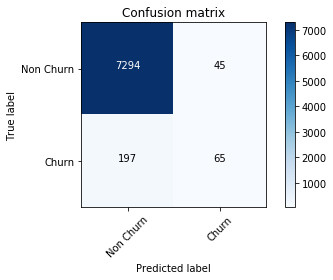

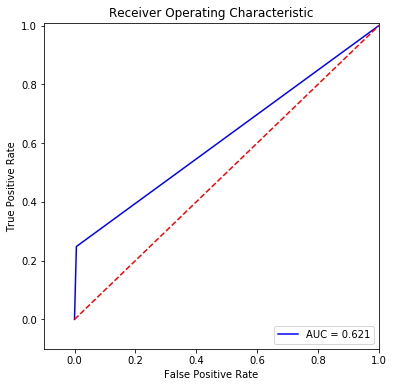

In [302]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100,random_state=0)
# Train the model on training data
rf.fit(X_train_scaled, y_train);
train_pred = rf.predict(X_train_scaled)
predictions = rf.predict(X_test_scaled)
modelEvaluationMatrix(y_train,y_test,train_pred,predictions)

In [287]:
### Important Features
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances[0:50]

,importance
roam_ic_mou_8,0.047017
total_og_mou_8,0.033947
roam_og_mou_8,0.033648
loc_ic_t2m_mou_8,0.032617
total_ic_mou_8,0.032542
loc_ic_mou_8,0.028946
loc_og_mou_8,0.024619
loc_og_t2m_mou_8,0.019660
loc_ic_t2t_mou_8,0.017068
third_recharge_gap,0.016176


Train Accuracy ::  0.9999436111424382
Test Accuracy  ::  0.949085646625444
 Confusion matrix  [[7138  201]
 [ 186   76]]
Confusion Report ::               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7339
           1       0.27      0.29      0.28       262

   micro avg       0.95      0.95      0.95      7601
   macro avg       0.62      0.63      0.63      7601
weighted avg       0.95      0.95      0.95      7601

Confusion matrix, without normalization
[[7138  201]
 [ 186   76]]
Roc and auc score: 0.6313442041836513


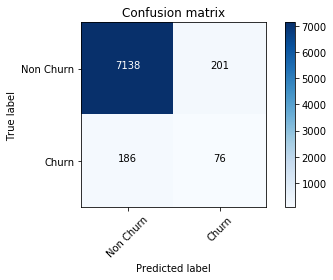

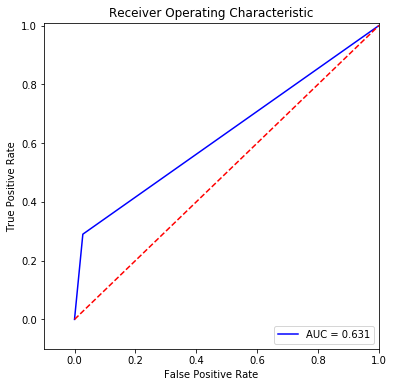

In [303]:
svclassifier = svm.SVC(kernel='rbf',C=1000,gamma=1e-2)  
svclassifier.fit(X_train_scaled, y_train) 
y_pred = svclassifier.predict(X_test_scaled) 
train_pred = svclassifier.predict(X_train_scaled)  
modelEvaluationMatrix(y_train,y_test,train_pred,y_pred)

In [ ]:
### XGBoost classification

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
# make predictions for test data
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]
train_pred = model.predict(X_train_scaled)
predictions_train = [round(value) for value in train_pred]
#predictions = rf.predict(X_test_scaled)
modelEvaluationMatrix(y_train,y_test,train_pred,predictions)

#### PCA Implementation

In [304]:
#Improting the PCA module
pca = PCA(svd_solver='randomized', random_state=42)
#Doing the PCA on the train data
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

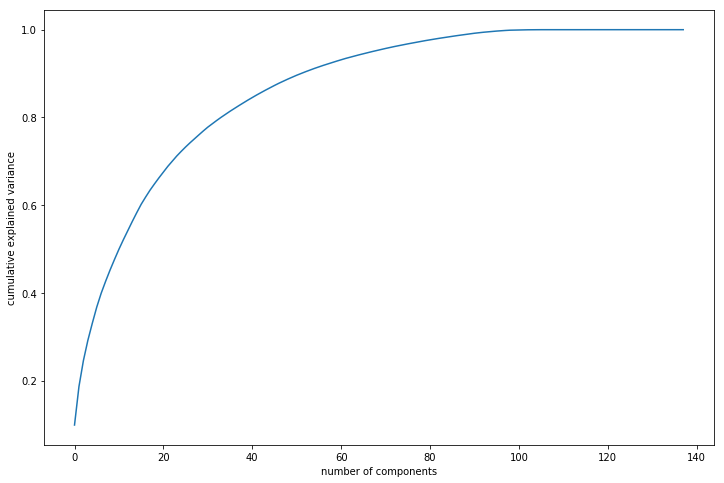

In [305]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [306]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09890576, 0.18659071, 0.24568948, 0.29173026, 0.33070602,
       0.36753241, 0.39923201, 0.42649557, 0.45220137, 0.47631632,
       0.49961094, 0.52136001, 0.5422661 , 0.56283416, 0.58278333,
       0.60197536, 0.61846274, 0.63427279, 0.64852723, 0.66229591,
       0.67544757, 0.68850797, 0.70040646, 0.71196679, 0.72252434,
       0.73265165, 0.74220696, 0.75137106, 0.76036933, 0.76933033,
       0.77788079, 0.78556297, 0.79306557, 0.80033273, 0.80725484,
       0.81406192, 0.82056224, 0.82694779, 0.83324874, 0.83939893,
       0.84533278, 0.85118449, 0.85679202, 0.86229722, 0.86761788,
       0.87285888, 0.87792694, 0.88269733, 0.8873383 , 0.89174796,
       0.89614714, 0.90026966, 0.90418894, 0.9080529 , 0.91173693,
       0.91529172, 0.91867905, 0.92193448, 0.92516511, 0.92832853,
       0.93143434, 0.934438  , 0.93721214, 0.93989925, 0.94256523,
       0.94517051, 0.9477011 , 0.95012984, 0.95252717, 0.95487249,
       0.95719369, 0.95945417, 0.96159918, 0.9636638 , 0.96568

In [307]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

df_train_pca = pca_final.fit_transform(X_train_scaled)
df_train_pca.shape

(17734, 80)

In [308]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test_scaled)
df_test_pca.shape

(7601, 80)

#### Applying a logistic regression on our Principal Components


Train Accuracy ::  1.0
Test Accuracy  ::  0.9652677279305355
 Confusion matrix  [[7336    3]
 [ 261    1]]
Confusion Report ::               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7339
           1       0.25      0.00      0.01       262

   micro avg       0.97      0.97      0.97      7601
   macro avg       0.61      0.50      0.49      7601
weighted avg       0.94      0.97      0.95      7601

Confusion matrix, without normalization
[[7336    3]
 [ 261    1]]
Roc and auc score: 0.5017040094278293


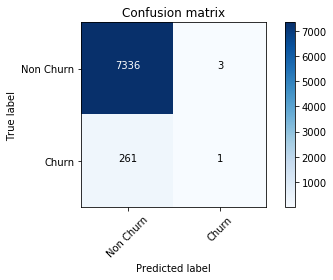

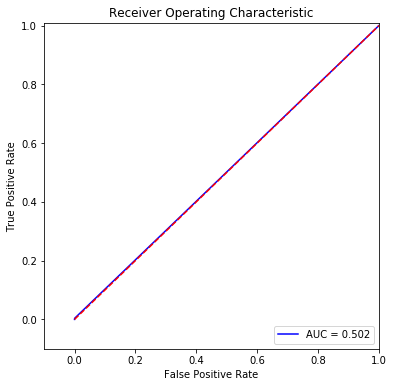

In [309]:
#Training the model on the train data

learner_pca = RandomForestClassifier(n_estimators=100,random_state=0)
model_pca = learner_pca.fit(df_train_pca,y_train)

#Making prediction on the test data
pred_probs_test = model_pca.predict(df_test_pca)
pred_probs_train = model_pca.predict(df_train_pca)


modelEvaluationMatrix(y_train,y_test,pred_probs_train, pred_probs_test)


In [ ]:
pipe_svm = Pipeline([('pca', PCA()),
			('clf', svm.SVC(random_state=42))])

# Set grid search params
grid_params = [{'pca__n_components': [40, 70, 100],
    'clf__gamma': [1e-2, 1e-3, 1e-4],
    'clf__C': [1, 10, 100, 1000]}]

 # creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

gs = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params,
			scoring='accuracy',
			cv=folds)

# Fit using grid search
gs.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

In [245]:
##Churn Rate:::
sum(y)/len(y)*100

3.3274126702190645

#### Churn rate is 3.3% only, Data is too imbalance to predict. SMOTE data to manage imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))